# First Two Course Progression - Matrix Display


A couple of examples of how to display a matrix that records progression from one course to the next.

The example is worked up in R.

In [128]:
#Going to use ggplot2 graphics
library(ggplot2)

In [ ]:
library(magrittr)
library(dplyr)
library(tidyr)

## Create Some Dummy Data

Create dummy data for example purposes.

In [184]:
courses=c("TU100","TM129","TM111","U101", "M250","M256","T215","T320","TM351","TM352")

In [185]:
#N is number of data points
#Create course1, course2 pair for each ID, where course1 != course2
N=1000

df<-NULL
for(id in 1:N) {
    x=sample(courses, 2, replace = FALSE)
    df= rbind(df,data.frame(id=id,course1=x[1],course2=x[2]))
    }
#Just in case we need as character eg in matrix
df[,1]=as.character(df[,1])
head(df)

id,course1,course2
1,TM352,TM129
2,TM352,TM129
3,TM129,U101
4,TM352,M256
5,TM351,U101
6,T215,TU100


In [186]:
#Count the number of (course1, course2) pairs
df = df %>% group_by(course1,course2) %>% tally()
head(df)

course1,course2,n
TM352,TM129,13
TM352,U101,11
TM352,M256,19
TM352,TU100,13
TM352,T320,11
TM352,TM111,15


## Example heatmap

Darker colour is bigger number

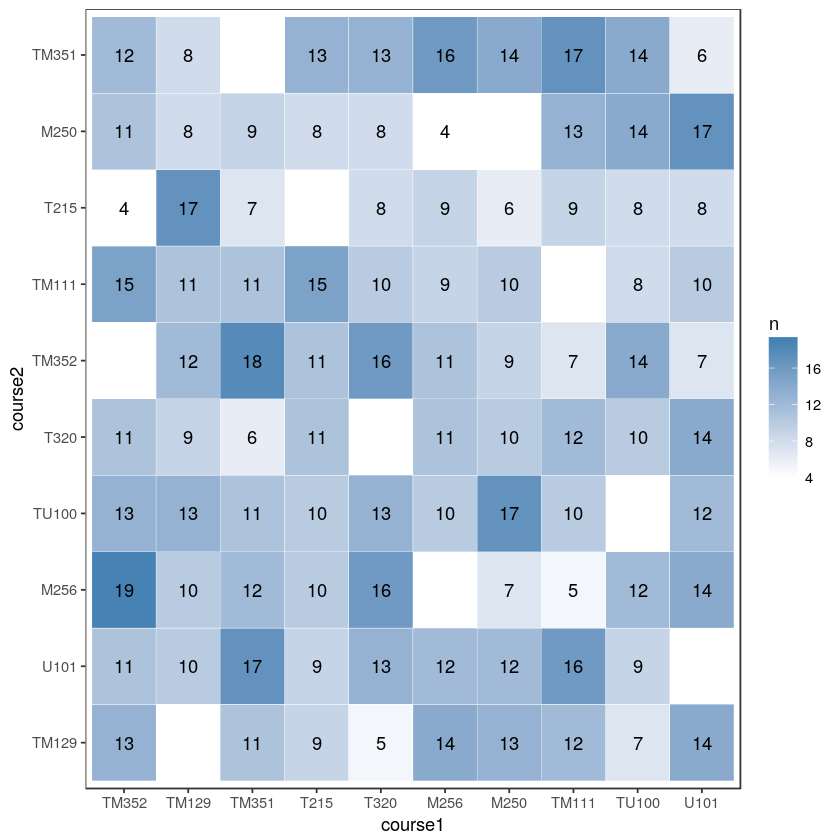

In [187]:
g = ggplot(df, aes(course1, course2, label=n))
g = g + geom_tile(aes(fill = n),colour = "white") 
g = g + geom_text()  #Hide this element if you don't want the count dsiplayed
g + scale_fill_gradient(low = "white",high = "steelblue")+ theme_bw()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

## Display Matrix Bubble Chart

Size of the bubble is proportional to count.

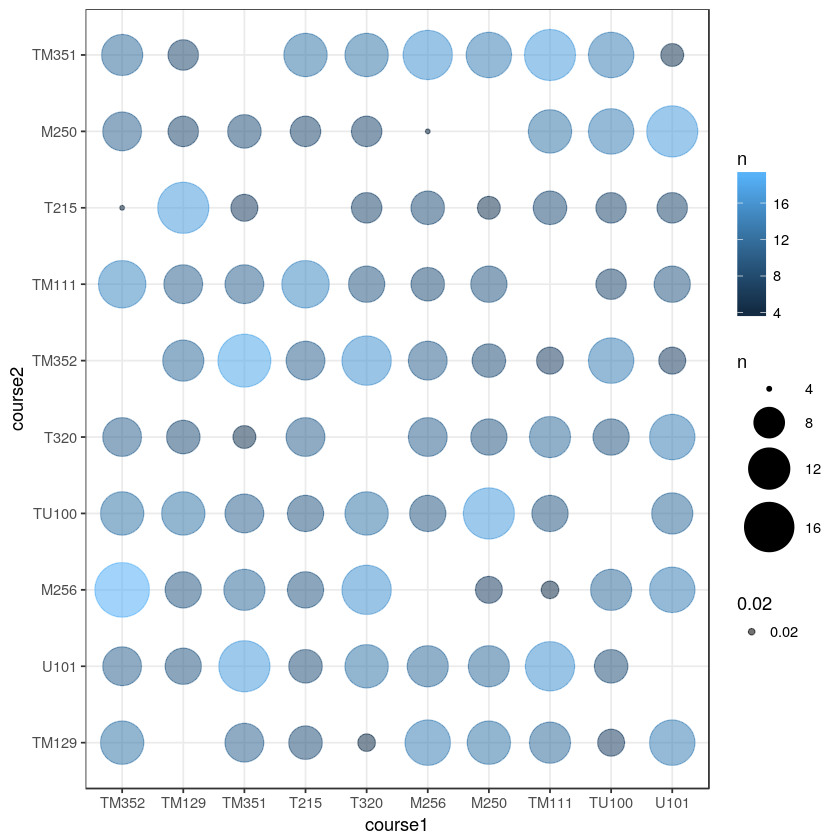

In [188]:
ggplot(df, aes(course1, course2)) +
    geom_point(aes(size = n, colour = n, alpha=.02)) + 
    scale_size(range = c(1,15)) +
    theme_bw()

## Transform to Matrix

Some plotters may want data as a matrix.

In [196]:
#Reshape
df_sq=spread(df, key = course2, value = n) %>% as.data.frame

In [197]:
#USe course1 as index
row.names(df_sq) = df_sq$course1
df_sq = df_sq[-1]

In [198]:
df_sq

,TM129,U101,M256,TU100,T320,TM352,TM111,T215,M250,TM351
TM352,13,11,19,13,11,NA,15,4,11,12
TM129,NA,10,10,13,9,12,11,17,8,8
TM351,11,17,12,11,6,18,11,7,9,NA
T215,9,9,10,10,11,11,15,NA,8,13
T320,5,13,16,13,NA,16,10,8,8,13
M256,14,12,NA,10,11,11,9,9,4,16
M250,13,12,7,17,10,9,10,6,NA,14
TM111,12,16,5,10,12,7,NA,9,13,17
TU100,7,9,12,NA,10,14,8,8,14,14
U101,14,NA,14,12,14,7,10,8,17,6


In [199]:
#Sort
df_sq = df_sq[ , order(names(df_sq))]
df_sq = df_sq[order(row.names(df_sq)), ]
df_sq

,M250,M256,T215,T320,TM111,TM129,TM351,TM352,TU100,U101
M250,NA,7,6,10,10,13,14,9,17,12
M256,4,NA,9,11,9,14,16,11,10,12
T215,8,10,NA,11,15,9,13,11,10,9
T320,8,16,8,NA,10,5,13,16,13,13
TM111,13,5,9,12,NA,12,17,7,10,16
TM129,8,10,17,9,11,NA,8,12,13,10
TM351,9,12,7,6,11,11,NA,18,11,17
TM352,11,19,4,11,15,13,12,NA,13,11
TU100,14,12,8,10,8,7,14,14,NA,9
U101,17,14,8,14,10,14,6,7,12,NA


In [164]:
#Save matrix data file
write.table(as.matrix(df_sq), file="mymatrix.txt", row.names=FALSE, col.names=FALSE, sep=',')

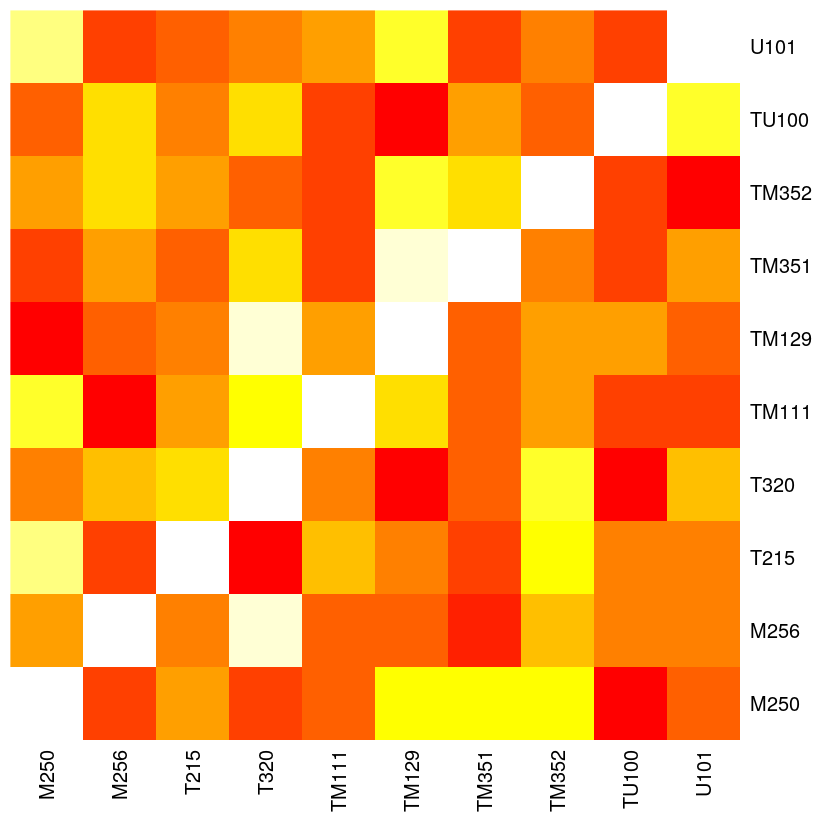

In [189]:
#Example of heatmap using matrix
heatmap(as.matrix(df_sq), Rowv=NA,Colv=NA)

In [200]:
df_sq

,M250,M256,T215,T320,TM111,TM129,TM351,TM352,TU100,U101
M250,NA,7,6,10,10,13,14,9,17,12
M256,4,NA,9,11,9,14,16,11,10,12
T215,8,10,NA,11,15,9,13,11,10,9
T320,8,16,8,NA,10,5,13,16,13,13
TM111,13,5,9,12,NA,12,17,7,10,16
TM129,8,10,17,9,11,NA,8,12,13,10
TM351,9,12,7,6,11,11,NA,18,11,17
TM352,11,19,4,11,15,13,12,NA,13,11
TU100,14,12,8,10,8,7,14,14,NA,9
U101,17,14,8,14,10,14,6,7,12,NA


## Reshape Back

Example of putting wide/square data back to long format.

In [210]:
df_sq_full = rownames_to_column(df_sq, "course1")
df_sq_full

course1,M250,M256,T215,T320,TM111,TM129,TM351,TM352,TU100,U101
M250,NA,7,6,10,10,13,14,9,17,12
M256,4,NA,9,11,9,14,16,11,10,12
T215,8,10,NA,11,15,9,13,11,10,9
T320,8,16,8,NA,10,5,13,16,13,13
TM111,13,5,9,12,NA,12,17,7,10,16
TM129,8,10,17,9,11,NA,8,12,13,10
TM351,9,12,7,6,11,11,NA,18,11,17
TM352,11,19,4,11,15,13,12,NA,13,11
TU100,14,12,8,10,8,7,14,14,NA,9
U101,17,14,8,14,10,14,6,7,12,NA


In [211]:
#How to get the long data frame back from the wide/square one
df_sq_full = df_sq_full %>% gather(course2,n, -course1)
head(df_sq_full)

course1,course2,n
M250,M250,NA
M256,M250,4
T215,M250,8
T320,M250,8
TM111,M250,13
TM129,M250,8


In [4]:
#devtools::install_github("mattflor/chorddiag")

from URL https://api.github.com/repos/mattflor/chorddiag/zipball/master
Installing chorddiag
'/usr/local/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore  \
  --quiet CMD INSTALL  \
  '/tmp/RtmpGY5XYU/devtools264ed420f9/mattflor-chorddiag-86b1652'  \
  --library='/usr/local/lib/R/site-library' --install-tests 



In [160]:
library(chorddiag)

In [121]:
chorddiag(as.matrix(df_sq))

Warning message in RColorBrewer::brewer.pal(n, palette):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”

HTML widgets cannot be represented in plain text (need html)